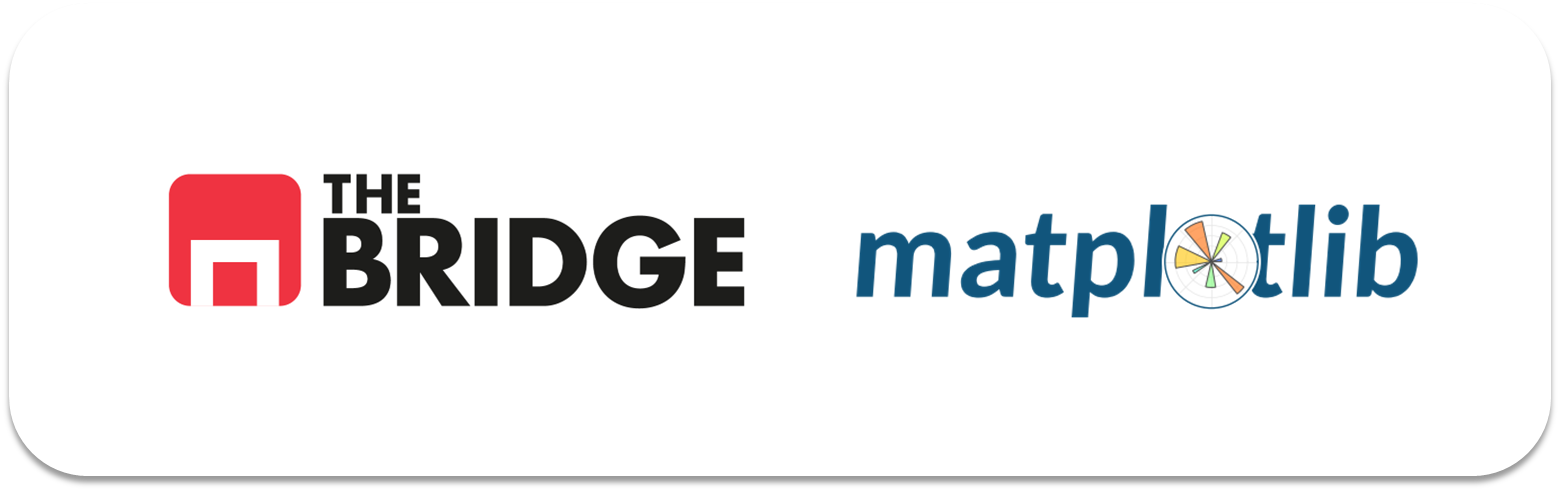

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [25]:
df_casas = pd.read_csv("./data/california_cities.csv")
df_casas.dropna(inplace=True)
df_casas

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

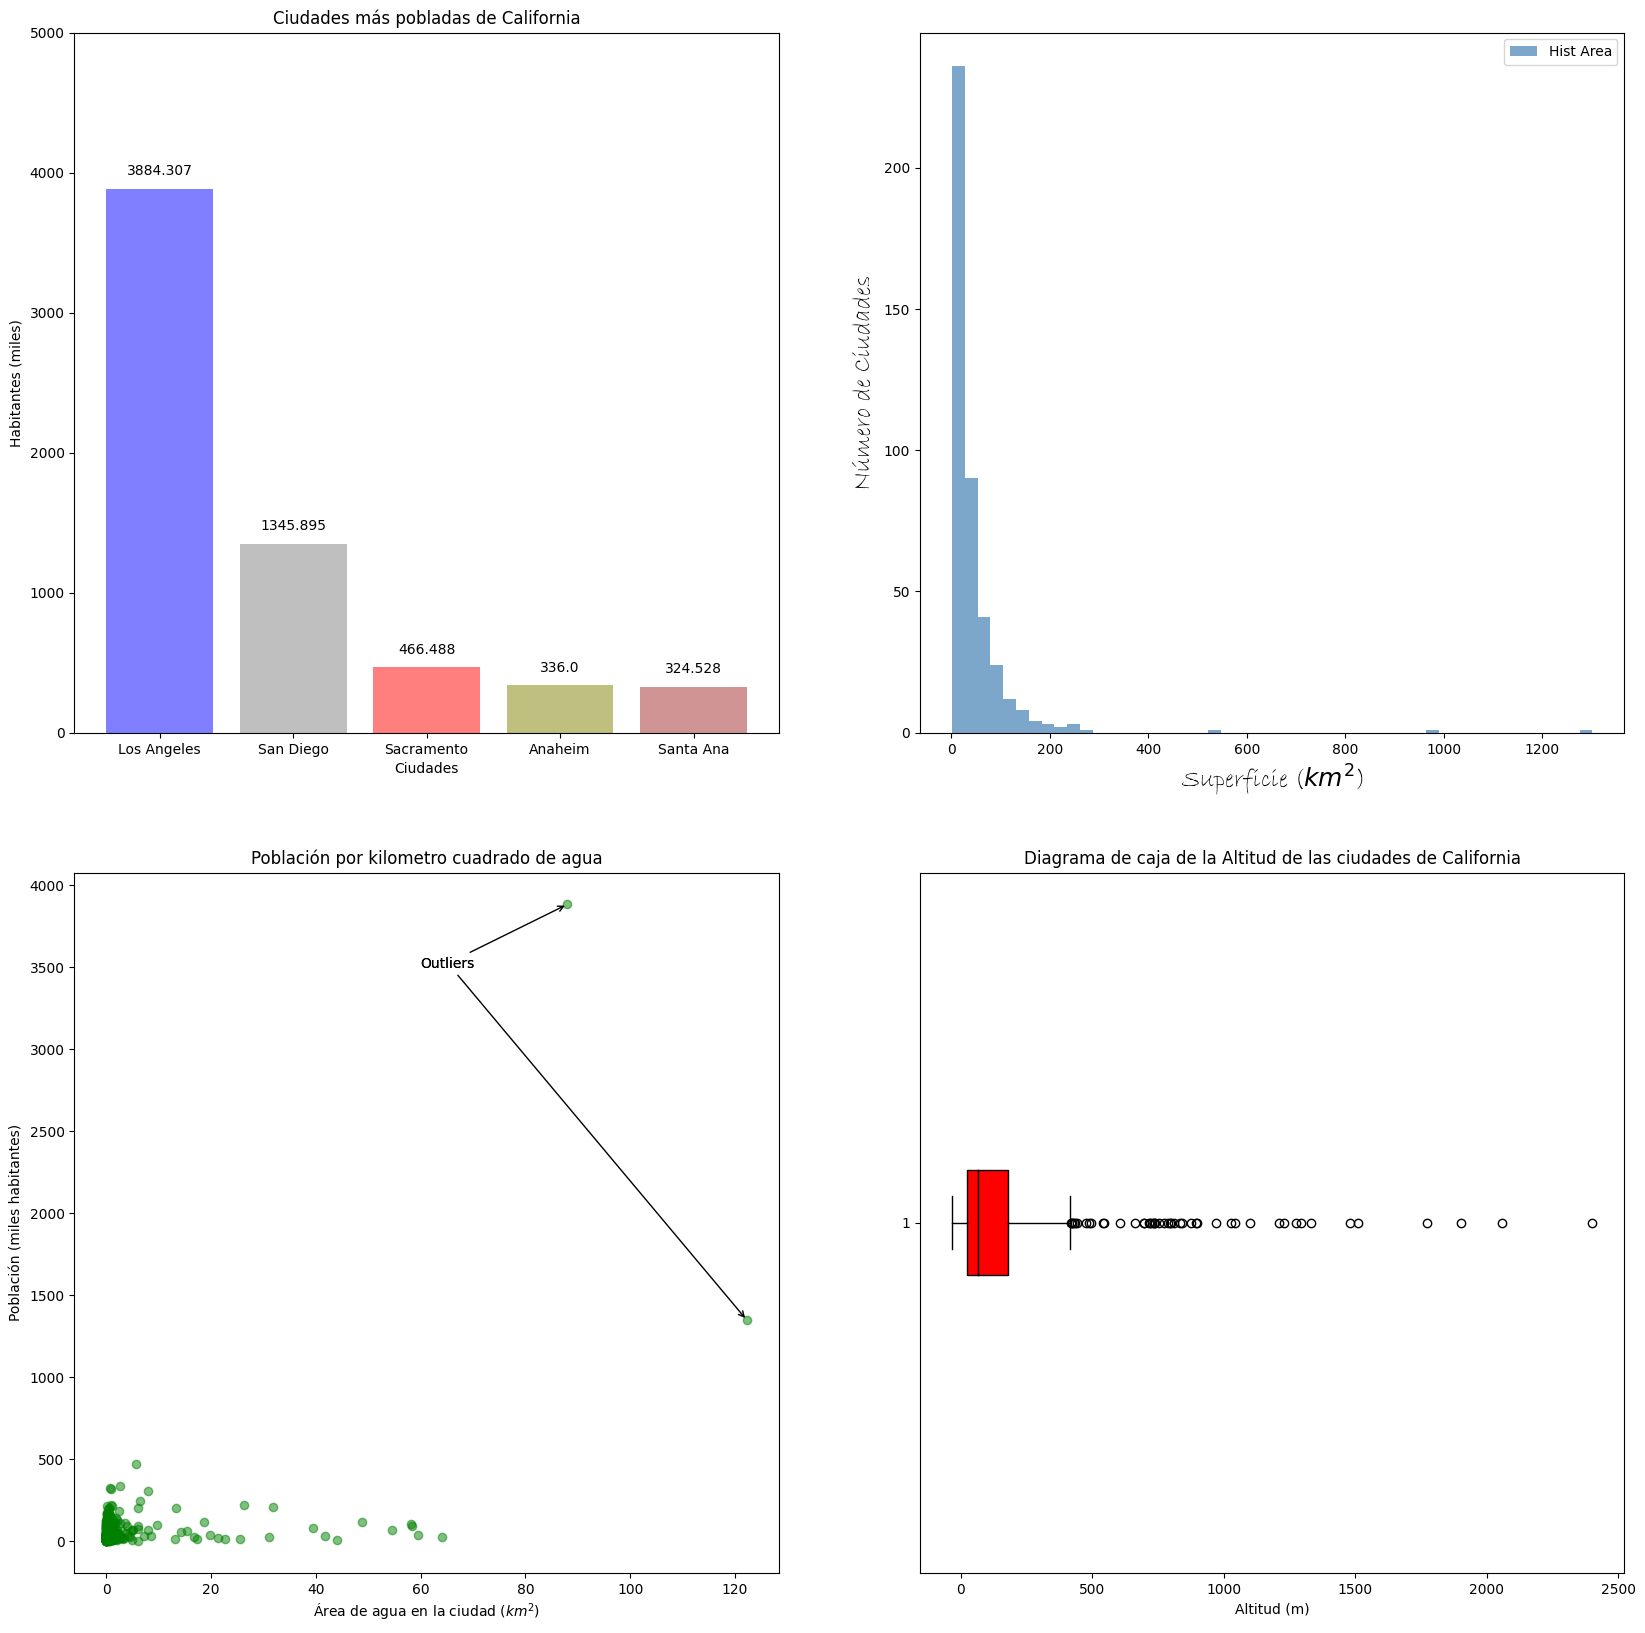

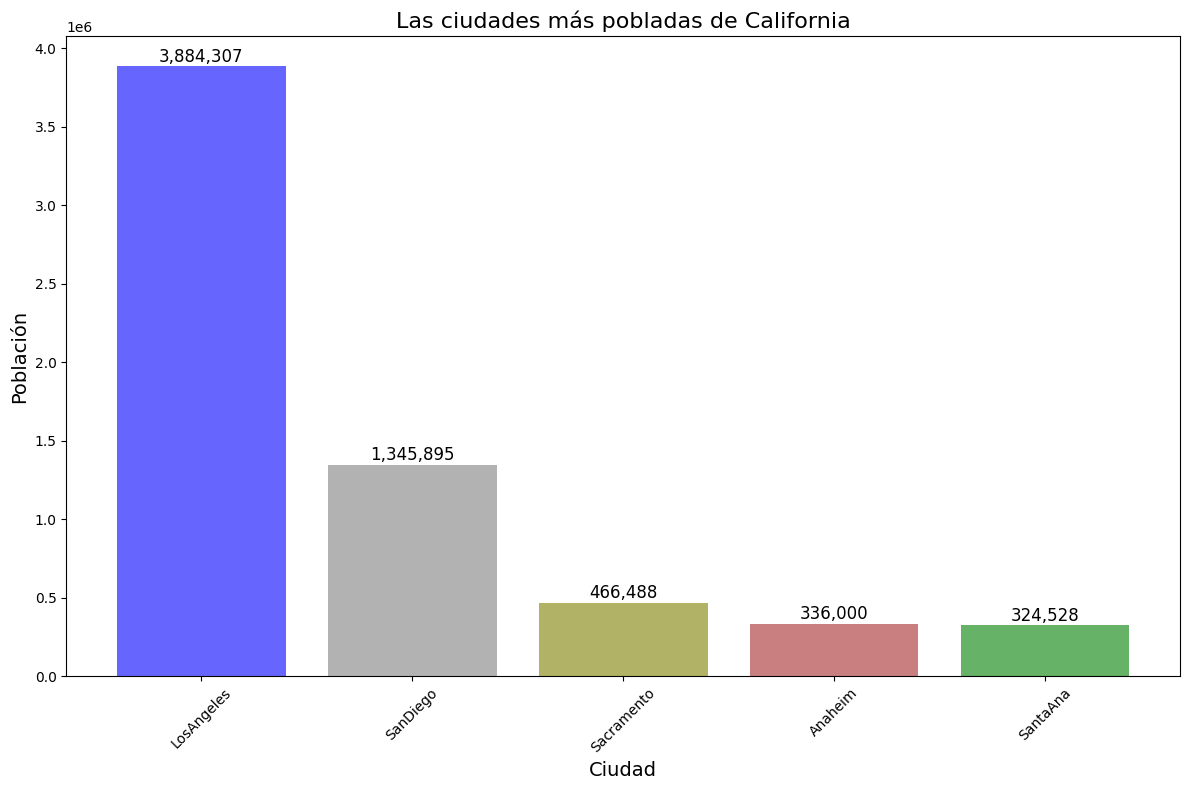

In [67]:
# 1. Ciudades más pobladas de California
#agrupacmos los habitantes por ciudad para quedarnos con las 5 ciudades con más habitantes
city_population = df_casas.groupby('city')['population_total'].sum().reset_index()
top_cities = city_population.nlargest(5, 'population_total')

#arreglamos los datos dentro de las variables para que se puedan usar en la visualizacion
cities = top_cities['city']
populations = top_cities['population_total']

#empezamos a codificar para hacer el grafico
plt.figure(figsize=(12, 8))
bars = plt.bar(cities, populations, color=['blue', 'gray', 'olive', 'brown', 'green'], alpha=0.6)

#usamos el codigo siguiente para poder ver los habitantes encima las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5000,
             f'{int(height):,}',  
             ha='center', va='bottom', fontsize=12, color='black')

#acabamos de poner las etiquetas
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Población', fontsize=14)
plt.title('Las ciudades más pobladas de California', fontsize=16)
plt.xticks(rotation=45, ha='center') #aqui ponemos lo comentado en el enunciado para que quede centrado 
plt.tight_layout()

plt.show()

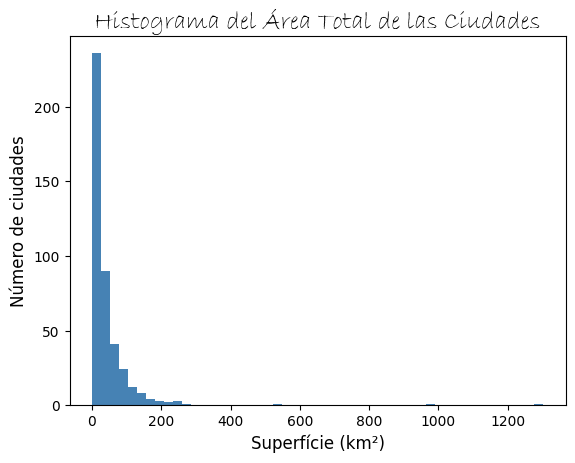

In [28]:
# 2. Histograma del área total ocupada por las ciudades
plt.hist(df_casas['area_total_km2'], bins=50, color='steelblue')
plt.title('Histograma del Área Total de las Ciudades', fontname='Bradley Hand ITC', fontsize=18)
plt.xlabel('Superfície (km²)', fontsize=12)
plt.ylabel('Número de ciudades', fontsize=12)
plt.show()

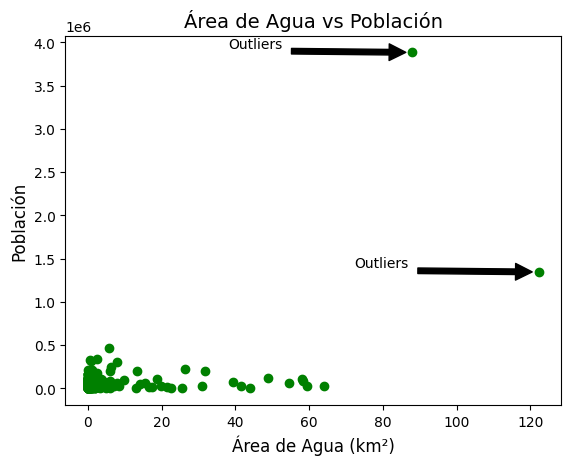

In [47]:
# 3. El scatter de área de agua de un ciudad con su población
plt.scatter(df_casas['area_water_km2'], df_casas['population_total'], color='green')
plt.title('Área de Agua vs Población', fontsize=14)
plt.xlabel('Área de Agua (km²)', fontsize=12)
plt.ylabel('Población', fontsize=12)

# Con este codigo marco los outliers que están marcados en el ejemplo. No he sabido hacerlo para que las dos flechas
#salieran de la misma palabra. Lo he hecho para los dos puntos outliers
outliers = df_casas[df_casas['area_water_km2'] > 80]
for i, row in outliers.iterrows():
    plt.annotate(
        'Outliers',
        xy=(row['area_water_km2'], row['population_total']),
        xytext=(row['area_water_km2'] - 50, row['population_total'] + 50000),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        color='black'
    )

plt.show()

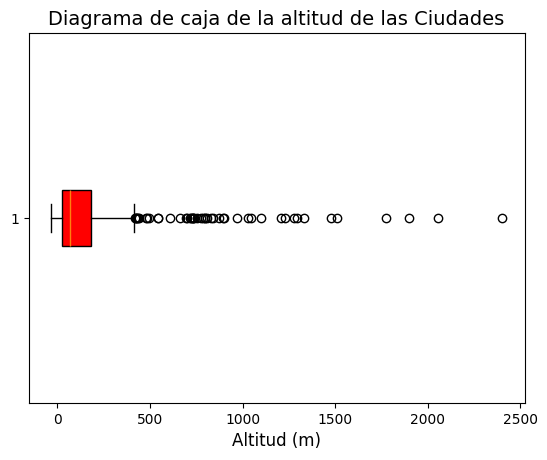

In [58]:
# 4. El boxplot de la altura de las ciudades
fig, ax = plt.subplots()
box = ax.boxplot(df_casas['elevation_m'], vert=False, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('red')
plt.title('Diagrama de caja de la altitud de las Ciudades', fontsize=14)
plt.xlabel('Altitud (m)', fontsize=12)
plt.show()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

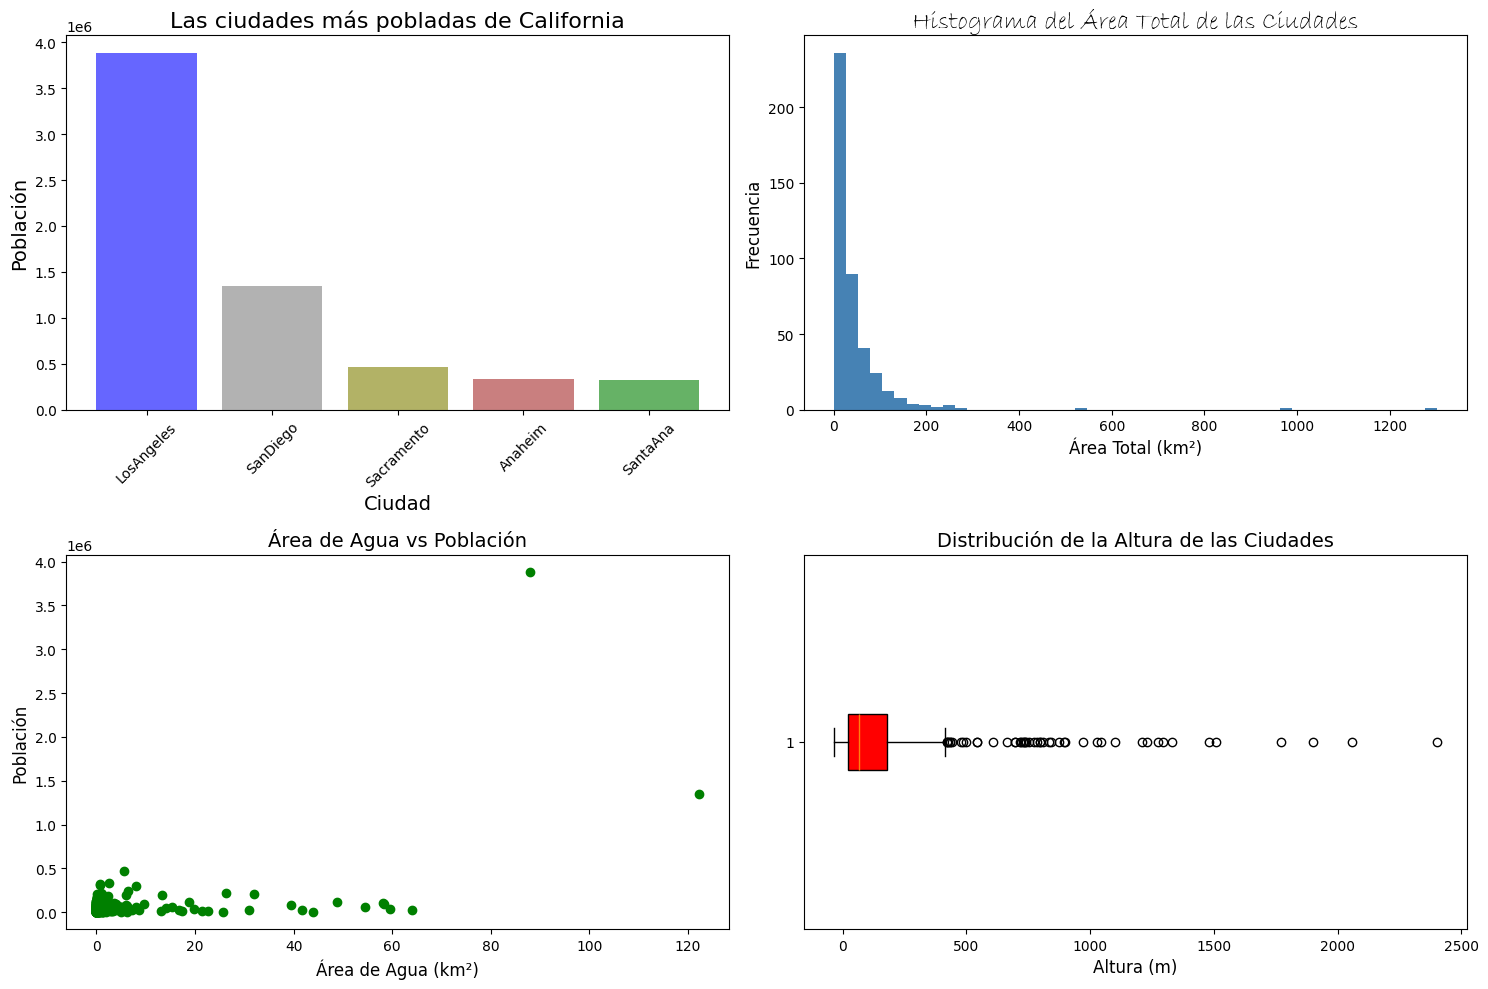

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Bar plot

city_population = df_casas.groupby('city')['population_total'].sum().reset_index()
top_cities = city_population.nlargest(5, 'population_total')
axs[0, 0].bar(cities, populations, color=['blue', 'gray', 'olive', 'brown', 'green'], alpha=0.6)
axs[0, 0].set_title('Las ciudades más pobladas de California', fontsize=16)
axs[0, 0].set_xlabel('Ciudad', fontsize=14)
axs[0, 0].set_ylabel('Población', fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=45)


# 2. Histograma
axs[0, 1].hist(df_casas['area_total_km2'], bins=50, color='steelblue')
axs[0, 1].set_title('Histograma del Área Total de las Ciudades', fontname='Bradley Hand ITC', fontsize=18)
axs[0, 1].set_xlabel('Área Total (km²)', fontsize=12)
axs[0, 1].set_ylabel('Frecuencia', fontsize=12)

# 3. Scatter plot
axs[1, 0].scatter(df_casas['area_water_km2'], df_casas['population_total'], color='green')
axs[1, 0].set_title('Área de Agua vs Población', fontsize=14)
axs[1, 0].set_xlabel('Área de Agua (km²)', fontsize=12)
axs[1, 0].set_ylabel('Población', fontsize=12)

# 4. Boxplot horizontal con caja roja
box = axs[1, 1].boxplot(df_casas['elevation_m'], vert=False, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('red')
axs[1, 1].set_title('Distribución de la Altura de las Ciudades', fontsize=14)
axs[1, 1].set_xlabel('Altura (m)', fontsize=12)

plt.tight_layout()
plt.show()

In [83]:
#guardamos la figura en una foto dentro de mi archivo
plt.tight_layout()
fig.savefig('practica1.png')  

plt.show()

<Figure size 640x480 with 0 Axes>